In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
%matplotlib inline

In [2]:
df = pd.read_csv('data/raw_data.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# capitalize the column value
df['person_gender'] = df['person_gender'].str.capitalize()
df['person_home_ownership'] = df['person_home_ownership'].str.capitalize()
df['loan_intent'] = df['loan_intent'].str.capitalize()

In [6]:
# calculate the vif
vif_df = df.select_dtypes(include=['number']) 
X = sm.add_constant(vif_df)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [7]:
vif_data

,Feature,VIF
0,const,357.367041
1,person_age,14.115597
2,person_income,1.440332
3,person_emp_exp,11.269554
4,loan_amnt,2.120769
5,loan_int_rate,1.151063
6,loan_percent_income,2.358551
7,cb_person_cred_hist_length,3.926491
8,credit_score,1.036069
9,loan_status,1.355448


In [8]:
df.drop(columns=['person_age', 'person_emp_exp'], inplace=True)

In [19]:
cols = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for col in cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

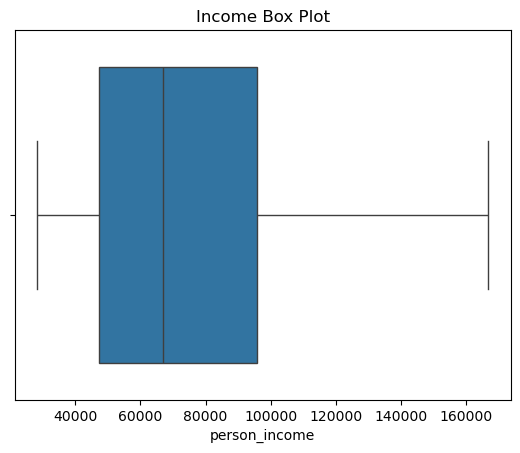

In [10]:
# box plot to detect the outliers
sns.boxplot(x=df['person_income'])
plt.title('Income Box Plot')
plt.show()

In [11]:
df['loan_amnt'] = winsorize(df['loan_amnt'], limits=[0.1, 0.1]) 

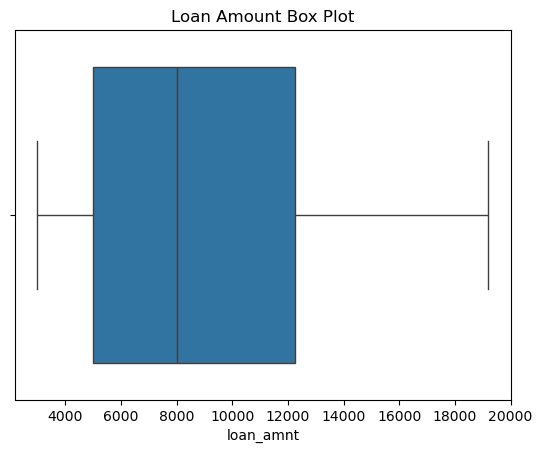

In [12]:
# box plot to after outliers removal
sns.boxplot(x=df['loan_amnt'])
plt.title('Loan Amount Box Plot')
plt.show()

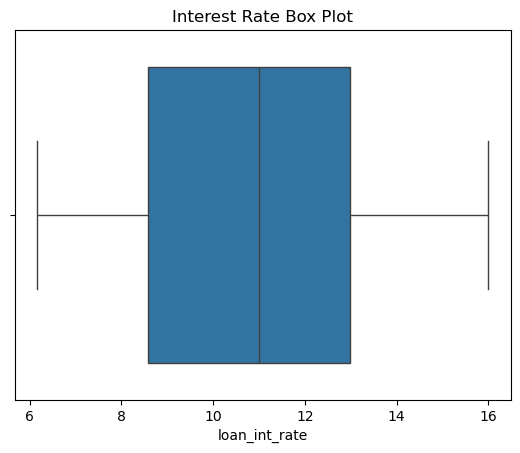

In [13]:
# box plot to detect the outliers
sns.boxplot(x=df['loan_int_rate'])
plt.title('Interest Rate Box Plot')
plt.show()

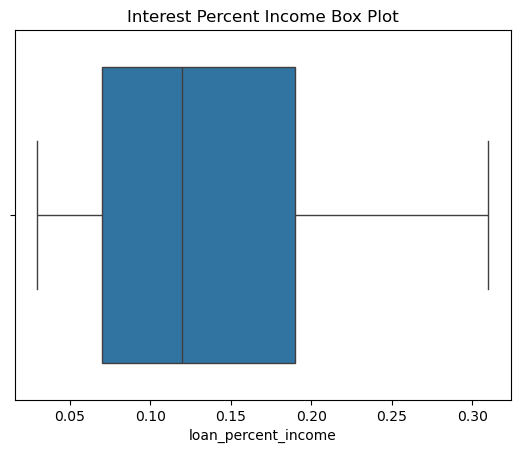

In [14]:
# box plot to detect the outliers
sns.boxplot(x=df['loan_percent_income'])
plt.title('Interest Percent Income Box Plot')
plt.show()

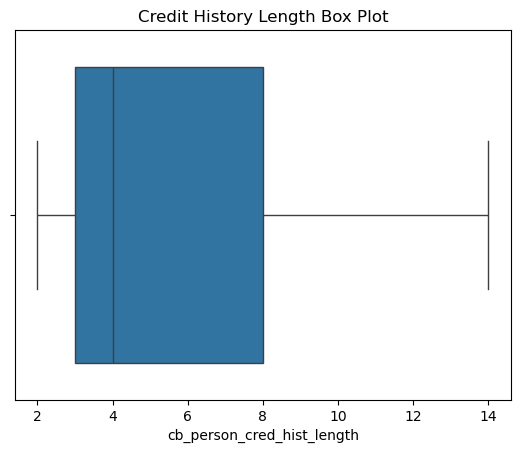

In [15]:
# box plot to detect the outliers
sns.boxplot(x=df['cb_person_cred_hist_length'])
plt.title('Credit History Length Box Plot')
plt.show()

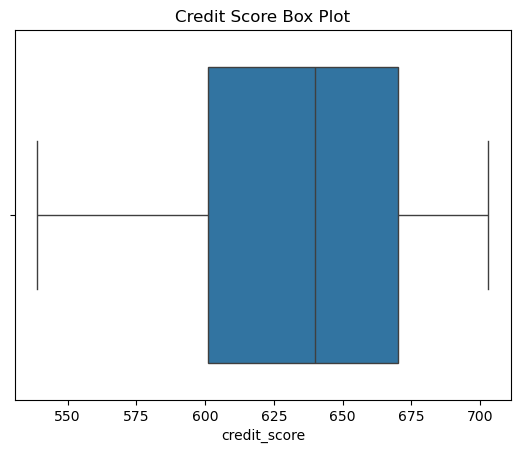

In [16]:
# box plot to detect the outliers
sns.boxplot(x=df['credit_score'])
plt.title('Credit Score Box Plot')
plt.show()

In [17]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [18]:
df.to_csv('data/clean_data.csv', index=False)